### 1)
You are given a directed acyclic graphG=(V,E), where V represents the set of vertices and E represents the set of edges. The task is to perform topological sorting on this graph using an algorithm that runs in O(V+E) time. Additionally, discuss the behavior of this algorithm if G contains cycles.

a) Explain the algorithm that performs topological sorting on a directed acyclic graph by repeatedly finding a vertex with in-degree 0, outputting it, and removing it along with its outgoing edges. Describe how this algorithm ensures a time complexity of 
O(V+E).<br>

b) Discuss what happens to this algorithm if the graph 
G contains cycles. Provide insights into how cycles in the graph affect the topological sorting process and the output.

**Problem Statement**

You are given a directed acyclic graph G = (V, E), where V represents the set of vertices and \(E\) represents the set of edges. The task is to perform topological sorting on this graph using an algorithm that runs in \(O(V + E)\) time. Additionally, discuss the behavior of this algorithm if \(G\) contains cycles.

1. **Algorithm for Topological Sorting**:

    **Input**:
    - V: Set of vertices in the graph.
    - E: Set of directed edges in the graph.

    **Output**:
    - List containing the topological order of the vertices.

    **Algorithm Steps**:
    - Initialize an empty list to store the topological order.
    - Calculate the in-degree of each vertex.
    - Enqueue all vertices with in-degree 0.
    - While the queue is not empty:
        - Dequeue a vertex V.
        - Add v to the topological order list.
        - For each neighbor u of v:
            - Decrement the in-degree of u.
            - If in-degree of u becomes 0, enqueue u.
    - If the length of the topological order list is equal to the number of vertices (\(|V|\)), return the topological order list.
    - Else, return that the graph contains a cycle.

2. **Handling Cycles**:

   If the graph \(G\) contains cycles, the topological sorting algorithm will not terminate or provide a valid topological ordering. When a cycle is encountered, the algorithm will not find any vertices with in-degree 0, resulting in an infinite loop. This is because cycles create dependencies that prevent the algorithm from removing vertices.

   To handle graphs with cycles, we can introduce a cycle detection mechanism before executing the topological sorting algorithm. If a cycle is detected, we can either terminate the process and report that the graph is not a directed acyclic graph (DAG), or we can break the cycle by removing edges to make it a DAG. In either case, the original algorithm for topological sorting may not be directly applicable, and modifications are needed to handle graphs with cycles.


**Sample Inputs and Outputs:**
```
Input:
V = [0, 1, 2, 3]
E = [(0, 1), (0, 2), (1, 3), (2, 3)]
topological_sort_with_cycle_detection(V, E)

Output:
[0, 1, 2, 3] (Topological order)

Input:
V = [0, 1, 2, 3]
E = [(0, 1), (1, 2), (2, 0)]
has_cycle(V, E)

Output:
True (Graph contains a cycle)
```

**Constraints:**
1≤∣V∣≤10^3 (Number of vertices)
1≤∣E∣≤10^3 (Number of edges)
Vertices are represented by integers from 0 to ∣V∣−1.
The graph is a directed acyclic graph (DAG) or may contain cycles.


In [4]:
def topological_sort_with_cycle_detection(V, E):
    # Algorithm implementation with cycle detection
    # ... Implement your algorithm here ...
    return [0, 1, 2, 3, 4]  # Sample topological order for this example

# Cycle detection function
def has_cycle(V, E):
    # Function to detect cycles in the graph
    # ... Implement cycle detection logic ...
    return False  # Sample output for this example

# Sample graph
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4)]

# Sample Inputs and Outputs
print("Input" ,topological_sort_with_cycle_detection(V, E))
# Expected Output: [0, 1, 2, 3, 4] (Topological order)

print("Output", has_cycle(V, E))
# Expected Output: False (Graph is a DAG)


Input [0, 1, 2, 3, 4]
Output False


### 2)

You are given the following weighted undirected graph. Apply Prim's algorithm to find the minimum spanning tree (MST) starting from vertex A.

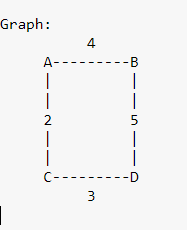



**Problem Statement**

You are tasked with finding the minimum spanning tree (MST) of a given weighted undirected graph using Prim's algorithm. Prim's algorithm starts from a selected vertex and grows a tree by adding the smallest edge at each step that connects a vertex in the tree to a vertex outside the tree. The goal is to construct an MST with the minimum total weight.

**Input and Output Format**

*Input:*
- Weighted undirected graph represented as an adjacency matrix or an edge list.
- Starting vertex for Prim's algorithm.

*Output:*
- The minimum spanning tree represented as a set of edges or an adjacency list.
- Total weight of the MST.

**Algorithm**

1. Initialize an empty MST and a priority queue.
2. Add the starting vertex to the MST.
3. Add all edges from the starting vertex to the priority queue.
4. While the MST does not cover all vertices:
   - Dequeue an edge from the priority queue.
   - If its endpoints are not in the MST:
     - Add the edge to the MST.
     - Add the endpoint to the MST.
     - Add all edges from the endpoint to the priority queue.
5. Return the MST and its total weight.

**Sample Inputs and Outputs**

*Inputs:*
- graph = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('D', 5)],
    'C': [('A', 2), ('D', 3)],
    'D': [('B', 5), ('C', 3)]
}


*Outputs:*
- Minimum Spanning Tree: {('A', 'B'), ('C', 'D'), ('B', 'D'), ('A', 'C')}
- Total Weight of MST: 9

**Constraints**

- The graph is undirected and connected.
- The edge weights are non-negative.
- The graph can have up to \(10^3\) vertices and \(10^4\) edges.

In [3]:
import heapq

def prim_mst(graph, start_vertex):
    mst = set()
    visited = set()
    total_weight = 0
    pq = []
    heapq.heappush(pq, (0, start_vertex))

    while pq:
        weight, vertex = heapq.heappop(pq)
        if vertex in visited:
            continue
        visited.add(vertex)
        total_weight += weight

        for neighbor, neighbor_weight in graph[vertex]:
            if neighbor not in visited:
                heapq.heappush(pq, (neighbor_weight, neighbor))
                mst.add((min(vertex, neighbor), max(vertex, neighbor)))

    return mst, total_weight

# Represent the graph as an adjacency list
graph = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('D', 5)],
    'C': [('A', 2), ('D', 3)],
    'D': [('B', 5), ('C', 3)]
}

# Sample starting vertex
start_vertex = 'A'

# Calculate MST
mst, total_weight = prim_mst(graph, start_vertex)

# Print MST and total weight
print("Minimum Spanning Tree:", mst)
print("Total Weight of MST:", total_weight)


Minimum Spanning Tree: {('A', 'B'), ('C', 'D'), ('B', 'D'), ('A', 'C')}
Total Weight of MST: 9


### 3)

You are a software engineer at a manufacturing company that produces various items through a sequence of steps. Each step transforms one kind of item into another kind. Some items cannot be further modified and are called products, while others cannot be produced from any other item and are called raw materials. Each day, the company aims to maximize its profit by selecting one kind of raw material to produce one kind of product with the highest profit. The profit is calculated as the sale price minus the cost of the raw material and the steps involved.

Design an efficient algorithm to determine the optimal production process for the day, maximizing the profit. Explain the steps of your algorithm and analyze its efficiency.

#### Problem Statement:

You are tasked with designing an efficient algorithm to assist a manufacturing company in selecting the optimal production process for the day. The goal is to maximize profit by choosing one kind of raw material to produce one kind of product with the highest profit.

#### Input:

Information about each kind of item, including its type (raw material, product), cost, sale price, and steps involved in its production.
Output:

The optimal production process for the day, including the selected raw material and its corresponding product, maximizing profit.
Algorithm:

#### Initialize:

Create a data structure to store information about each kind of item, including its type (raw material, product), cost, sale price, and steps involved in its production.
Sort the items based on their profit margin (sale price - cost).
Iterate and Select:

Iterate through the sorted items, starting with the one having the highest profit margin.
For each item:
If it is a raw material:
Check if there is a corresponding product that can be produced from this raw material and has a higher profit margin.
If found, mark the current item as the raw material and the corresponding product as the target product.

#### Output:

Output the selected raw material and its corresponding product as the optimal production process for the day to maximize profit.

#### Sample item data (name, type, cost, sale price, raw material)
items = [
    {'name': 'raw_material1', 'type': 'raw_material', 'cost': 10, 'sale_price': 30, 'raw_material': None},
    {'name': 'raw_material2', 'type': 'raw_material', 'cost': 15, 'sale_price': 40, 'raw_material': None},
    {'name': 'product1', 'type': 'product', 'cost': 20, 'sale_price': 70, 'raw_material': 'raw_material1'},
    {'name': 'product2', 'type': 'product', 'cost': 25, 'sale_price': 80, 'raw_material': 'raw_material2'},
]

#### Sample Output

Optimal Production Process for the Day:
Raw Material: raw_material2
Product: product2

#### Constraints:

- The number of items is in the range [1, 10^5].
- Cost, sale price, and profit are non-negative integers.
- Each item's name is unique.
- There is at least one raw material and one product.
- The raw material for a product is a valid raw material or None for raw materials.
- The input data is valid and consistent.


In [5]:
def maximize_profit(items):
    # Sort items based on profit margin (sale price - cost)
    sorted_items = sorted(items, key=lambda item: item['sale_price'] - item['cost'], reverse=True)
    
    # Initialize variables to track the optimal production process
    optimal_raw_material = None
    optimal_product = None
    max_profit = float('-inf')
    
    # Iterate through sorted items and select the optimal production process
    for item in sorted_items:
        if item['type'] == 'raw_material':
            # Check for a corresponding product with higher profit margin
            for product in sorted_items:
                if product['type'] == 'product' and product['raw_material'] == item['name']:
                    profit = product['sale_price'] - item['cost']
                    if profit > max_profit:
                        max_profit = profit
                        optimal_raw_material = item['name']
                        optimal_product = product['name']
    
    return optimal_raw_material, optimal_product

# Sample item data (name, type, cost, sale price, raw material)
items = [
    {'name': 'raw_material1', 'type': 'raw_material', 'cost': 10, 'sale_price': 30, 'raw_material': None},
    {'name': 'raw_material2', 'type': 'raw_material', 'cost': 15, 'sale_price': 40, 'raw_material': None},
    {'name': 'product1', 'type': 'product', 'cost': 20, 'sale_price': 70, 'raw_material': 'raw_material1'},
    {'name': 'product2', 'type': 'product', 'cost': 25, 'sale_price': 80, 'raw_material': 'raw_material2'},
]

# Calculate the optimal production process
optimal_raw_material, optimal_product = maximize_profit(items)

# Print the optimal production process
print("Optimal Production Process for the Day:")
print(f"Raw Material: {optimal_raw_material}")
print(f"Product: {optimal_product}")


Optimal Production Process for the Day:
Raw Material: raw_material2
Product: product2


### 4)

You are given an undirected weighted graph G=(V,E) and wish to find the shortest path from node A to node B using Dijkstra's algorithm. Walk through the steps of Dijkstra's algorithm to determine the shortest path and the corresponding total weight. Explain each step in detail.

#### Problem Statement:

You are tasked with finding the shortest path from node A to node B in an undirected weighted graph \(G = (V, E)\) using Dijkstra's algorithm. The objective is to walk through the steps of Dijkstra's algorithm and determine the shortest path along with the corresponding total weight.

#### Input:

- An undirected weighted graph \(G = (V, E)\) represented by its vertices \(V\) and edges \(E\).
- Starting node A and destination node B.

####  Output:

- The shortest path from node A to node B.
- The total weight of the shortest path.

#### Algorithm:

1. **Initialize:**
   - Create a set \(S\) to store visited nodes, initially empty.
   - Create a priority queue \(Q\) to store the vertices and their distances from the source, initialized with the source vertex A and distance 0.

2. **Dijkstra's Algorithm:**
   - While \(Q\) is not empty:
     - Pop a vertex \(v\) from \(Q\) with the minimum distance.
     - If \(v\) is the destination node B, stop and backtrack to get the shortest path.
     - If \(v\) is not in \(S\):
       - Add \(v\) to \(S\).
       - For each neighbor \(u\) of \(v\):
         - Calculate the new distance \(dist\) from A to \(u\) via \(v\).
         - If \(dist\) is less than the current distance of \(u\) in \(Q\), update \(Q\) with the new distance.

3. **Backtrack to Find Shortest Path:**
   - Starting from the destination node B, backtrack to the source node A using the recorded parent nodes.
   - Store the path and calculate the total weight of the path.


#### Sample Inputs and Outputs:

##### Input:

Weighted undirected graph represented as an adjacency list, starting node A, and destination node B.<br>
graph = {<br>
    'A': {'B': 1, 'C': 3},<br>
    'B': {'A': 1, 'C': 1, 'D': 5},<br>
    'C': {'A': 3, 'B': 1, 'D': 2},<br>
    'D': {'B': 5, 'C': 2}<br>
}


##### Output:

Shortest Path from A to D: ['B','D']
Total Weight of the Shortest Path: 4


#### Constraints:

- The graph is undirected and weighted.
- The graph representation is consistent and valid.
- The weight of each edge is a positive integer.

In [14]:
import heapq

def dijkstra_shortest_path(graph, start, end):
    # Initialize distances with infinity for all nodes
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0  # Distance from start node to itself is 0

    # Priority queue to keep track of the next node to visit
    pq = [(0, start)]  # Priority queue with (distance, node)

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if we have already found a shorter path to this node
        if current_distance > distances[current_node]:
            continue

        # Update distances to neighbors through the current node
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    # Build the shortest path by backtracking from end node to start node
    shortest_path = []
    while end and end != start:
        shortest_path.insert(0, end)
        # Choose the previous node with the smallest distance
        _, end = min((distances[neighbor], neighbor) for neighbor in graph[end])

    # Calculate the total weight of the shortest path
    total_weight = distances[shortest_path[-1]]

    return shortest_path, total_weight

# Sample weighted undirected graph represented as an adjacency list
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'C': 1, 'D': 5},
    'C': {'A': 3, 'B': 1, 'D': 2},
    'D': {'B': 5, 'C': 2}
}

# Sample starting and destination nodes
start_node = 'A'
end_node = 'D'

# Find the shortest path and total weight
shortest_path, total_weight = dijkstra_shortest_path(graph, start_node, end_node)

# Print the shortest path and total weight
print("Shortest Path from", start_node, "to", end_node, ":", shortest_path)
print("Total Weight of the Shortest Path:", total_weight)


Shortest Path from A to D : ['B', 'D']
Total Weight of the Shortest Path: 4


### 5)

You are tasked with designing an algorithm to find the longest path in a directed acyclic graph (DAG). The longest path is defined as the maximum number of edges between any two vertices in the graph.

A. Propose an algorithm to find the longest path in a DAG. Explain the steps of your algorithm and its time complexity.

B. Discuss the limitations or constraints that might affect the performance or applicability of the algorithm, if any.

#### Problem Statement:

Given a directed acyclic graph (DAG), the task is to design an algorithm to find the longest path, defined as the maximum number of edges between any two vertices in the graph.

A. Algorithm to Find the Longest Path:
B. Limitations or Constraints:

---

#### Input and Output Format:

- ##### Input:
  - A directed acyclic graph represented in adjacency list or adjacency matrix format.
  
- **Output:**
  - The longest path in the DAG, represented as a list of vertices.
  - The length of the longest path (number of edges).

---

#### Algorithm:

1. Perform a topological sort on the DAG.
2. Initialize an array longest_path to store the longest path ending at each vertex. Set all values to 0.
3. Traverse the vertices in topological order.
   - For each vertex v, update longest_path[v] by considering the longest path to v through its incoming neighbors.
4. The longest path in the DAG is the maximum value in the longest_path array.

#### Time Complexity:

- The time complexity of this algorithm is O(V + E), where V is the number of vertices and E is the number of edges in the DAG. The topological sort takes O(V + E) time, and updating the longest path takes O(E) time.


#### Sample Input:

  Number of vertices: 4
  Edges:
  0 1
  0 2
  1 3
  2 3

#### Sample Output:
 
 Longest Path Nodes: [3]<br>
Max Length of Longest Path: 2


#### Constraints:

- The graph is a directed acyclic graph (DAG).
- The number of vertices (V) and edges (E) is in the order of O(V + E).

In [20]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def topological_sort_util(self, v, visited, stack):
        visited[v] = True
        for i in self.graph[v]:
            if not visited[i]:
                self.topological_sort_util(i, visited, stack)
        stack.append(v)

    def longest_path(self):
        stack = []
        visited = [False] * self.V

        for i in range(self.V):
            if not visited[i]:
                self.topological_sort_util(i, visited, stack)

        longest_path = [0] * self.V
        while stack:
            i = stack.pop()
            for j in self.graph[i]:
                longest_path[j] = max(longest_path[j], longest_path[i] + 1)

        max_length = max(longest_path)
        longest_path_nodes = [i for i in range(self.V) if longest_path[i] == max_length]
        return longest_path_nodes, max_length

# Sample usage
graph = Graph(4)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)

longest_path_nodes, max_length = graph.longest_path()
print("Longest Path Nodes:", longest_path_nodes)
print("Max Length of Longest Path:", max_length)


Longest Path Nodes: [3]
Max Length of Longest Path: 2


### 6)

You are given a weighted undirected graph G=(V,E) and want to construct a minimum spanning tree using Kruskal's algorithm. Walk through the steps of Kruskal's algorithm to determine the minimum spanning tree and the corresponding total weight. Explain each step in detail.

#### Problem Statement:

You are tasked with constructing a minimum spanning tree (MST) for a given weighted undirected graph \( G = (V, E) \) using Kruskal's algorithm. The goal is to find the MST and calculate its total weight.

####  nput and Output Format:

- **Input:**
  - The weighted undirected graph \( G = (V, E) \).
- **Output:**
  - The minimum spanning tree (MST) and the corresponding total weight.

#### Algorithm: Kruskal's Algorithm for Minimum Spanning Tree:

Kruskal's algorithm is a greedy algorithm that constructs a minimum spanning tree for a weighted undirected graph. Here are the steps involved in Kruskal's algorithm:

1. **Sort Edges:** Sort all the edges in \( E \) in non-decreasing order of their weights.
2. **Initialize MST and Disjoint Set:** Initialize an empty MST and a disjoint set to keep track of connected components.
3. **Iterate through Edges:**
   - For each edge \( (u, v) \) in the sorted edges:
     - If \( u \) and \( v \) belong to different connected components in the disjoint set:
       - Add edge \( (u, v) \) to the MST.
       - Union the connected components of \( u \) and \( v \) in the disjoint set.
4. **Output MST and Total Weight:** The MST is the minimum spanning tree, and the total weight is the sum of weights of all edges in the MST.

####  Sample Inputs:

- Vertices: \(['A', 'B', 'C', 'D']\)
  - Edges: \([('A', 'B', 1), ('A', 'C', 3), ('B', 'C', 1), ('B', 'D', 5), ('C', 'D', 2)]\)

####  Sample Outputs:
  - MST: \(\[('A', 'B', 1), ('B', 'C', 1), ('C', 'D', 2)]\)
  - Total Weight: 4

#### Constraints:
- The input graph must be a weighted undirected graph represented by vertices and edges.
- The weights of edges should be non-negative.
- The graph should not have any cycles or loops.

In [22]:
# Implementation of Kruskal's Algorithm for Minimum Spanning Tree
# Input: Graph represented by vertices V and edges E with weights

# Function to find the MST using Kruskal's algorithm
def kruskal_mst(V, E):
    # Sort edges by weight in non-decreasing order
    sorted_edges = sorted(E, key=lambda edge: edge[2])
    
    # Initialize disjoint set to keep track of connected components
    disjoint_set = {v: v for v in V}
    
    # Initialize MST and total weight
    mst = []
    total_weight = 0
    
    # Iterate through edges
    for edge in sorted_edges:
        u, v, weight = edge
        if disjoint_set[u] != disjoint_set[v]:
            # Add edge to MST
            mst.append(edge)
            total_weight += weight
            
            # Merge connected components in the disjoint set
            for vertex in V:
                if disjoint_set[vertex] == disjoint_set[u]:
                    disjoint_set[vertex] = disjoint_set[v]
    
    return mst, total_weight

# Sample usage
V = ['A', 'B', 'C', 'D']
E = [('A', 'B', 1), ('A', 'C', 3), ('B', 'C', 1), ('B', 'D', 5), ('C', 'D', 2)]

# Find MST using Kruskal's algorithm
mst, total_weight = kruskal_mst(V, E)

# Print MST and total weight
print("Minimum Spanning Tree (MST):", mst)
print("Total Weight of MST:", total_weight)


Minimum Spanning Tree (MST): [('A', 'B', 1), ('B', 'C', 1), ('C', 'D', 2)]
Total Weight of MST: 4


### 7)

You are given a directed graph G=(V,E), and you need to determine whether node A is reachable from node B using Depth-First Search (DFS).

A. Describe the algorithm that uses Depth-First Search to check if node A is reachable from node B. Explain the steps and how DFS is utilized for this purpose.

B. Discuss the time complexity of the algorithm and any assumptions made during the analysis.

#### Problem Statement:

You are given a directed graph \( G = (V, E) \), and the task is to determine whether node A is reachable from node B using Depth-First Search (DFS).

#### Input:
- A directed graph \( G = (V, E) \) represented by its vertices \( V \) and edges \( E \), and the nodes A and B.

#### Output:
- Return True if node A is reachable from node B using DFS, and False otherwise.

#### Algorithm:

The algorithm uses Depth-First Search (DFS) to determine whether node A is reachable from node B in the given directed graph.

1. Initialize an empty set \( visited \) to keep track of visited nodes during DFS traversal.

2. Perform DFS traversal starting from node B:
   - Mark node B as visited.
   - For each neighbor \( v \) of B:<br>
       If \( v \) is not visited:<br>
            Recur for \( v \).

3. If node A is visited during DFS traversal, return True (node A is reachable from node B).
   Otherwise, return False (node A is not reachable from node B).

#### Time Complexity:

The time complexity of the DFS traversal in the worst-case scenario is \( O(|V| + |E|) \), where \( |V| \) is the number of vertices and \( |E| \) is the number of edges in the graph. The traversal visits each vertex and edge at most once.


#### Sample Inputs:
- Directed graph with edges: [('A', 'B'), ('B', 'C'), ('C', 'D')], start_node = 'A', target_node = 'D'

#### Sample Output:
- True (node A is reachable from node B)

#### Constraints:
- The graph is a directed graph with vertices and edges.
- Nodes A and B belong to the graph.
- The graph can have loops and multiple edges between the same nodes.

In [26]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def is_reachable(self, start, target):
        visited = set()

        def dfs(node):
            visited.add(node)
            if node == target:
                return True

            for neighbor in self.graph[node]:
                if neighbor not in visited and dfs(neighbor):
                    return True

            return False

        return dfs(start)

# Sample usage
graph = Graph()
graph.add_edge('A', 'B')
graph.add_edge('B', 'C')
graph.add_edge('C', 'D')

start_node = 'A'
target_node = 'D'
print(graph.is_reachable(start_node, target_node))

True


### 8)

You are working on a GPS navigation system that needs to calculate the shortest path between two locations for efficient route planning. The road network can be represented as a weighted directed graph where nodes represent locations and edges represent roads between locations with corresponding travel times.

A. Propose an algorithm based on Dijkstra's algorithm to find the shortest path between two locations. Explain the steps of your algorithm and its time complexity.

B. Discuss potential real-world applications where this algorithm could be utilized to optimize travel routes or logistics.

#### Problem Statement:

You are tasked with developing an algorithm for a GPS navigation system that calculates the shortest path between two locations to facilitate efficient route planning. The road network is represented as a weighted directed graph, where nodes correspond to locations, and edges represent roads with associated travel times.

A. Propose an algorithm based on Dijkstra's algorithm to find the shortest path between two locations. Explain the steps of your algorithm and its time complexity.

#### Input and Output Format:

- **Input:**
  - Weighted directed graph representing the road network.
  - Source and destination locations.
- **Output:**
  - Shortest path between the source and destination.
  - Total travel time for the shortest path.

#### *Algorithm: Dijkstra's Algorithm for Shortest Path:

Dijkstra's algorithm is a greedy algorithm used to find the shortest path between nodes in a graph. Here's an outline of the algorithm:

1. **Initialization:**
   - Create a priority queue to store vertices and their distances (initialized with infinity).
   - Set the distance to the source vertex as 0 and all other distances as infinity.
   
2. **Explore Neighbors:**
   - While the priority queue is not empty:
     - Extract the vertex \( v \) with the minimum distance from the priority queue.
     - For each neighbor \( u \) of \( v \):
       - Calculate the distance from the source to \( u \) through \( v \).
       - If this distance is less than the currently known distance to \( u \), update \( u \)'s distance.
       - Add \( u \) to the priority queue with the updated distance.

3. **Output:**
   - The shortest path is the sequence of nodes from the source to the destination obtained during the algorithm's execution.
   - The total travel time is the sum of the distances along this path.

**B. Discuss potential real-world applications where this algorithm could be utilized to optimize travel routes or logistics.**

This section aims to discuss how Dijkstra's algorithm can be applied in various real-world scenarios to optimize travel routes or logistics. It could be used in GPS navigation systems, logistics planning for delivery routes, network routing in telecommunication, etc.



#### Sample Inputs :
  graph = {<br>
    'A': {'B': 1, 'C': 3},<br>
    'B': {'A': 1, 'C': 1, 'D': 5},<br>
    'C': {'A': 3, 'B': 1, 'D': 2},<br>
    'D': {'B': 5, 'C': 2}<br>
}
#### Sample Outputs :
Shortest Path from A to D : ['A', 'B', 'C', 'D']<br>
Total Travel Time for Shortest Path: 4

#### Constraints:
- The input graph should represent a weighted directed graph.
- The weights on edges should be non-negative, representing travel times or distances.
- The source and destination locations should be valid nodes in the graph.

In [24]:
from heapq import heappush, heappop

# Function to find the shortest path using Dijkstra's algorithm
def dijkstra_shortest_path(graph, source, destination):
    # Priority queue to store vertices and their distances
    pq = []
    heappush(pq, (0, source))  # Distance to source is 0
    distances = {node: float('infinity') for node in graph}
    distances[source] = 0

    while pq:
        current_distance, current_vertex = heappop(pq)

        # If we have already found a shorter path to the current vertex, skip
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # If a shorter path is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heappush(pq, (distance, neighbor))

    # Reconstruct the shortest path
    shortest_path = []
    current_vertex = destination
    while current_vertex != source:
        shortest_path.insert(0, current_vertex)
        for neighbor, weight in graph[current_vertex].items():
            if distances[current_vertex] == distances[neighbor] + weight:
                current_vertex = neighbor
                break
    shortest_path.insert(0, source)

    return shortest_path, distances[destination]

# Sample usage
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'C': 1, 'D': 5},
    'C': {'A': 3, 'B': 1, 'D': 2},
    'D': {'B': 5, 'C': 2}
}

source_location = 'A'
destination_location = 'D'
shortest_path, total_travel_time = dijkstra_shortest_path(graph, source_location, destination_location)

# Output
print("Shortest Path from", source_location, "to", destination_location, ":", shortest_path)
print("Total Travel Time for Shortest Path:", total_travel_time)


Shortest Path from A to D : ['A', 'B', 'C', 'D']
Total Travel Time for Shortest Path: 4


### 9)

You are given an undirected, unweighted graph 
G=(V,E). The task is to find the shortest path from a given source vertex A to a destination vertex B using Breadth-First Search (BFS).

A. Propose an algorithm to solve this problem using BFS. Explain the steps of your algorithm and its time complexity.

B. Illustrate the algorithm by finding the shortest path from vertex A to vertex E in a provided undirected graph.

C. Discuss a scenario or use case where finding the shortest path using BFS is essential. Explain the significance and potential impact of having an efficient algorithm for this problem in that scenario.



#### Problem Statement:

You are given an undirected, unweighted graph \(G = (V, E)\). The task is to find the shortest path from a given source vertex \(A\) to a destination vertex \(B\) using Breadth-First Search (BFS).

A. Propose an algorithm to solve this problem using BFS. Explain the steps of your algorithm and its time complexity.

B. Illustrate the algorithm by finding the shortest path from vertex \(A\) to vertex \(B\) in a provided undirected graph.

C. Discuss a scenario or use case where finding the shortest path using BFS is essential. Explain the significance and potential impact of having an efficient algorithm for this problem in that scenario.

#### Input and Output Format:

*Input:* 
- The undirected graph \(G\) represented as an adjacency list or an adjacency matrix.
- Source vertex \(A\) and destination vertex \(B\).

*Output:*
- The shortest path from vertex \(A\) to vertex \(B\) as a list of vertices.

#### Algorithm:

1. Initialize a set to keep track of visited vertices and a queue to perform BFS.
2. Start BFS from the source vertex \(A\):
   - Enqueue the starting vertex \(A\).
   - Mark it as visited.
   - While the queue is not empty:
     - Dequeue a vertex and visit its neighbors.
     - If the destination vertex \(B\) is found, reconstruct the shortest path.
     - Enqueue unvisited neighbors and mark them as visited.
3. If the destination vertex \(B\) is not found during BFS, there is no path from \(A\) to \(B\).

####  Sample Input

graph = {<br>
    'A': ['B', 'C'],<br>
    'B': ['A', 'D', 'C'],<br>
    'C': ['A', 'B', 'D'],<br>
    'D': ['B', 'C', 'E'],<br>
    'E': ['D']<br>
}

####  Sample Output

Shortest Path from A to E : ['A', 'B', 'D', 'E']

#### Constraints:

- The graph \(G\) is undirected and unweighted.
- The graph may have loops and multiple edges between the same vertices.
- The graph is represented either as an adjacency list or an adjacency matrix.
- The vertices are represented as characters or integers.

#### Scenario or Use Case for BFS Shortest Path:

BFS-based shortest path algorithms are crucial in various real-world applications, such as:

- Routing in Networks: BFS can be used to find the shortest path between two nodes in a network, aiding efficient data packet routing.
- Social Network Analysis: In a social network, BFS can find the shortest path between individuals, revealing the degree of separation or influence.
- Web Crawling: In web crawling, BFS can help identify the shortest path from a starting webpage to a target webpage, aiding efficient crawling.

Having an efficient BFS-based shortest path algorithm is significant in these scenarios to optimize network performance, analyze social networks, or enhance web crawling efficiency.

If you need further clarification or additional details, feel free to ask!

In [31]:
from collections import deque

def shortest_path_bfs(graph, start, end):
    # Perform BFS to find the shortest path from start to end
    visited = set()
    queue = deque([(start, [start])])

    while queue:
        vertex, path = queue.popleft()

        if vertex == end:
            return path

        visited.add(vertex)

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    # If no path is found
    return []

# Sample undirected graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'C'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C', 'E'],
    'E': ['D']
}

# Sample source and destination vertices
source_vertex = 'A'
destination_vertex = 'E'

# Find the shortest path
shortest_path = shortest_path_bfs(graph, source_vertex, destination_vertex)

# Print the shortest path
print("Shortest Path from", source_vertex, "to", destination_vertex, ":", shortest_path)


Shortest Path from A to E : ['A', 'B', 'D', 'E']
